# Atividade Final

* Importação das bibliotecas e modulos 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')

# Importação bibliateca de funções
from src.data_visulization.visualization import *
from src.data_visulization.grafico import *
from src.data_cleaning.cleaning import drop_duplicados, limpa_dados_NAN


#### Carregamento dos dados 

In [2]:
tipo_encoding("../data/estado_regiao.csv")

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
df_consumo_energia = pd.read_csv("../data/consumo_energia_eletrica.csv", sep=',')
df_estados = pd.read_csv("../data/estado_regiao.csv", sep=';', encoding='ISO-8859-1')


In [4]:
df_consumo_energia.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


In [5]:
df_consumo_energia.groupby(['sigla_uf']).size()

sigla_uf
AC    1478
AL    1478
AM    1477
AP    1477
BA    1478
CE    1478
DF    1478
ES    1478
GO    1477
MA    1478
MG    1477
MS    1478
MT    1478
PA    1478
PB    1478
PE    1478
PI    1477
PR    1478
RJ    1477
RN    1478
RO    1478
RR    1478
RS    1477
SC    1477
SE    1478
SP    1477
TO    1478
dtype: int64

In [6]:
df_estados

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil
5,6,CE,Ceará,Nordeste,Brasil
6,7,DF,Distrito Federal,Centro-Oeste,Brasil
7,8,ES,Espírito Santo,Sudeste,Brasil
8,9,GO,Goiás,Centro-Oeste,Brasil
9,10,MA,Maranhão,Nordeste,Brasil


* Reaização de união dos dataset 
> comando (merge)

In [7]:
df_final = pd.merge(df_consumo_energia, df_estados, left_on='sigla_uf', right_on='sigla')

In [8]:
df_final.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
0,2004,1,TO,Total,NaN,65876,27,TO,Tocantins,Norte,Brasil
1,2004,1,BA,Total,NaN,1444451,5,BA,Bahia,Nordeste,Brasil
2,2004,1,PR,Total,NaN,1596274,16,PR,Paraná,Sul,Brasil
3,2004,1,RS,Total,NaN,1780912,21,RS,Rio Grande do Sul,Sul,Brasil
4,2004,1,GO,Total,NaN,630624,9,GO,Goiás,Centro-Oeste,Brasil


* Exclusão da coluna redundante após o merge

In [9]:
df_final.drop(columns='sigla', inplace=True)
df_final.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
0,2004,1,TO,Total,NaN,65876,27,Tocantins,Norte,Brasil
1,2004,1,BA,Total,NaN,1444451,5,Bahia,Nordeste,Brasil
2,2004,1,PR,Total,NaN,1596274,16,Paraná,Sul,Brasil
3,2004,1,RS,Total,NaN,1780912,21,Rio Grande do Sul,Sul,Brasil
4,2004,1,GO,Total,NaN,630624,9,Goiás,Centro-Oeste,Brasil


* Analisando a quantidade de registros e Atributos

In [10]:
df_final.shape

(39897, 10)

#### Analisando dados faltantes

* Analisando os tipos de dados, sé há dados faltantes?

In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   sigla_uf             39897 non-null  object 
 3   tipo_consumo         39897 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              39897 non-null  int64  
 6   id_estado            39897 non-null  int64  
 7   estado               39897 non-null  object 
 8   regiao               39897 non-null  object 
 9   pais                 39897 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 3.0+ MB


In [12]:
# Analisando a quantidade em percentual de dados faltantes

separacao = df_final.isna().sum()
final = (separacao / len(df_final['numero_consumidores'])) * 100
final

ano                     0.000000
mes                     0.000000
sigla_uf                0.000000
tipo_consumo            0.000000
numero_consumidores    32.483645
consumo                 0.000000
id_estado               0.000000
estado                  0.000000
regiao                  0.000000
pais                    0.000000
dtype: float64

In [13]:
visuliza_dados_NaN(df_final)

Foram detectado ano                        0
mes                        0
sigla_uf                   0
tipo_consumo               0
numero_consumidores    12960
consumo                    0
id_estado                  0
estado                     0
regiao                     0
pais                       0
dtype: int64 dados NaN


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
0,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
39892,False,False,False,False,False,False,False,False,False,False
39893,False,False,False,False,False,False,False,False,False,False
39894,False,False,False,False,False,False,False,False,False,False
39895,False,False,False,False,False,False,False,False,False,False


* De acordo com as instruções dos enunciado 
> Instruções para correção de dados ausentes  
> * Exclua todos os dados ausentes. 

In [14]:
"""conforme analise previa foram detectado dados ausentes apenas no numero de consumidores,
que equivalem a 32.48% dos dados, esses dados serão excluidos.
"""
limpa_dados_NAN(df_final)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
39893,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
39894,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
39895,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


* Visualização de dados duplicados

In [15]:
visuliza_duplicados(df_final, subset=['consumo', 'ano', 'mes', 'tipo_consumo'])

Existem 1017 registros duplicados.


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
38880,2023,11,MS,Outros,99710.0,122350,12,Mato Grosso do Sul,Centro-Oeste,Brasil
38881,2023,11,RN,Outros,77359.0,112767,20,Rio Grande do Norte,Nordeste,Brasil
38882,2023,11,PE,Outros,157848.0,256509,17,Pernambuco,Nordeste,Brasil
38883,2023,11,ES,Outros,234985.0,180315,8,Espírito Santo,Sudeste,Brasil
38884,2023,11,AC,Outros,23068.0,26323,1,Acre,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
39893,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
39894,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
39895,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


In [16]:
# Irei opitar por excluir os dados duplicados
drop_duplicados(df_final)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...
38875,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
38876,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
38877,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
38878,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


In [17]:
df_final.shape

(25920, 10)

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25920 entries, 648 to 38879
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  25920 non-null  int64  
 1   mes                  25920 non-null  int64  
 2   sigla_uf             25920 non-null  object 
 3   tipo_consumo         25920 non-null  object 
 4   numero_consumidores  25920 non-null  float64
 5   consumo              25920 non-null  int64  
 6   id_estado            25920 non-null  int64  
 7   estado               25920 non-null  object 
 8   regiao               25920 non-null  object 
 9   pais                 25920 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [19]:
tipos_consumo = df_final.groupby(['tipo_consumo', 'ano']).size()
tipos_consumo

tipo_consumo  ano 
Comercial     2004    324
              2005    324
              2006    324
              2007    324
              2008    324
                     ... 
Residencial   2019    324
              2020    324
              2021    324
              2022    324
              2023    324
Length: 80, dtype: int64

C:\Users\dyego\AppData\Local\Temp\ipykernel_20080\2514661392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final['consumo']).set_title('Consumo')


Text(0.5, 1.0, 'Consumo')

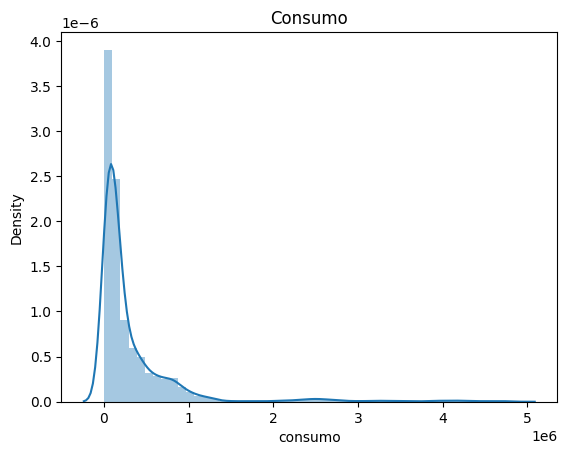

In [20]:
sns.distplot(df_final['consumo']).set_title('Consumo')

In [21]:
filtro_ano_2004 = df_final['ano'] == 2004
df_ano_2004 = df_final[filtro_ano_2004]


In [22]:
detectar_outliers_iqr(df_final, "consumo", 2005)

Limites para o ano 2005: -279648.12 a 577730.88
165 outliers encontrados na coluna "consumo" para o ano 2005


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
2608,2005,1,SP,Outros,320286.0,924587,25,São Paulo,Sudeste,Brasil
2631,2005,2,SP,Outros,320656.0,876532,25,São Paulo,Sudeste,Brasil
2665,2005,3,SP,Outros,320420.0,1001977,25,São Paulo,Sudeste,Brasil
2690,2005,4,SP,Outros,321808.0,1021197,25,São Paulo,Sudeste,Brasil
2708,2005,5,SP,Outros,321673.0,985314,25,São Paulo,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...
3851,2005,11,SP,Residencial,12137736.0,2192297,25,São Paulo,Sudeste,Brasil
3859,2005,11,RJ,Residencial,5450924.0,867503,19,Rio de Janeiro,Sudeste,Brasil
3865,2005,12,MG,Residencial,5260677.0,586869,13,Minas Gerais,Sudeste,Brasil
3870,2005,12,RJ,Residencial,5463087.0,938610,19,Rio de Janeiro,Sudeste,Brasil


#### Graficos
* grafico de consumo eletrico por região

C:\Users\dyego\AppData\Local\Temp\ipykernel_20080\756042116.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agrupado, x='sigla_uf', y='consumo', palette='Blues_d')


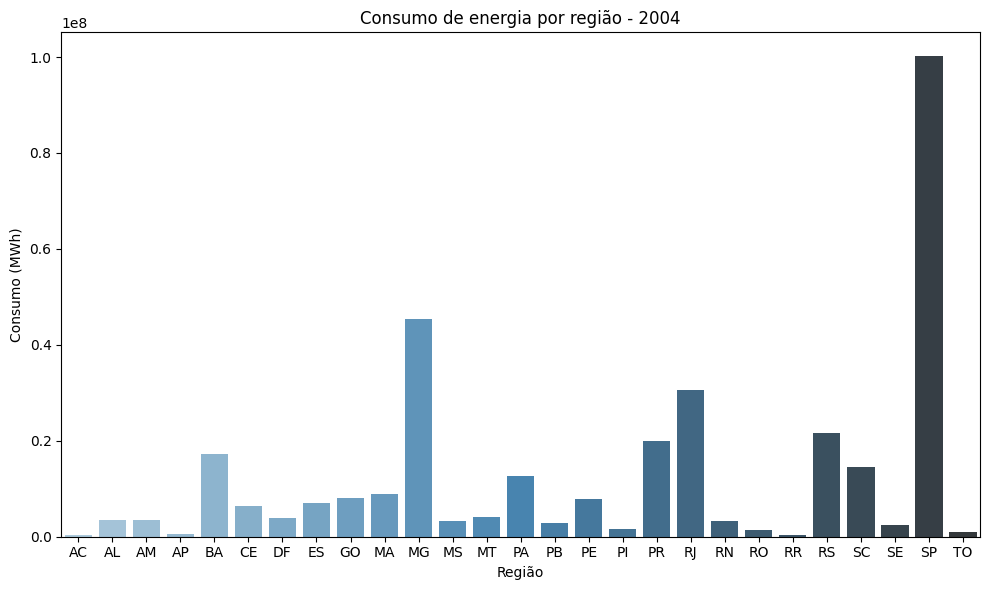

In [23]:
ano = 2004
df_filtro = df_final[df_final['ano'] == ano]

# Agrupa por região e soma o consumo
df_agrupado = df_filtro.groupby('sigla_uf')['consumo'].sum().reset_index()

# Cria gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agrupado, x='sigla_uf', y='consumo', palette='Blues_d')
plt.title(f'Consumo de energia por região - {ano}')
plt.xlabel('Região')
plt.ylabel('Consumo (MWh)')
plt.tight_layout()
plt.show()

c:\Users\dyego\Documents\Pos_graduacao_xp\ciencia_de_dados\Atividade_final\notebook\..\src\data_visulization\grafico.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agrupado, x='sigla_uf', y='consumo', palette='Blues_d')


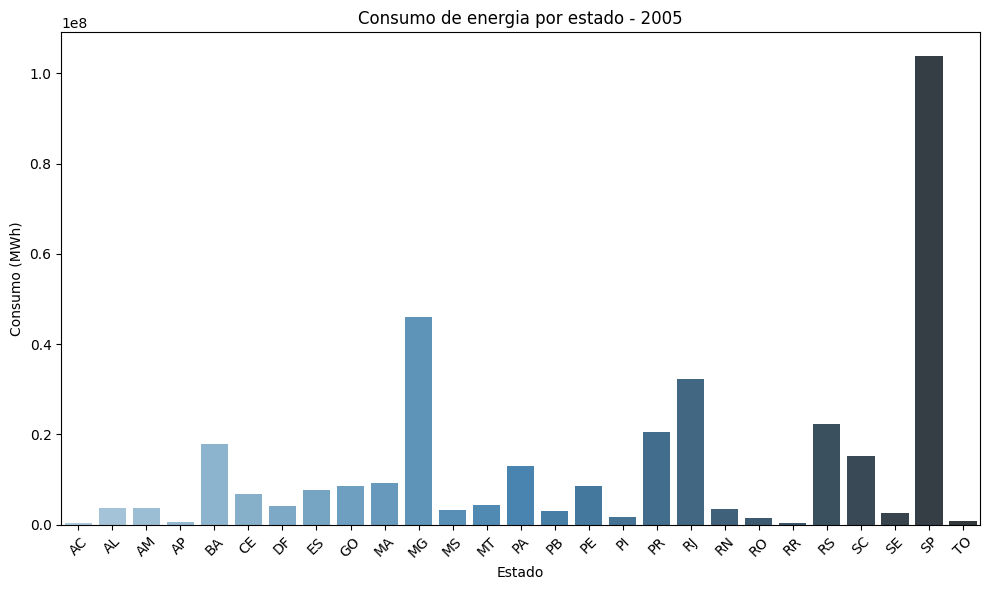

In [24]:
grafico_consumo_por_ano_estados(df_final, 2005)

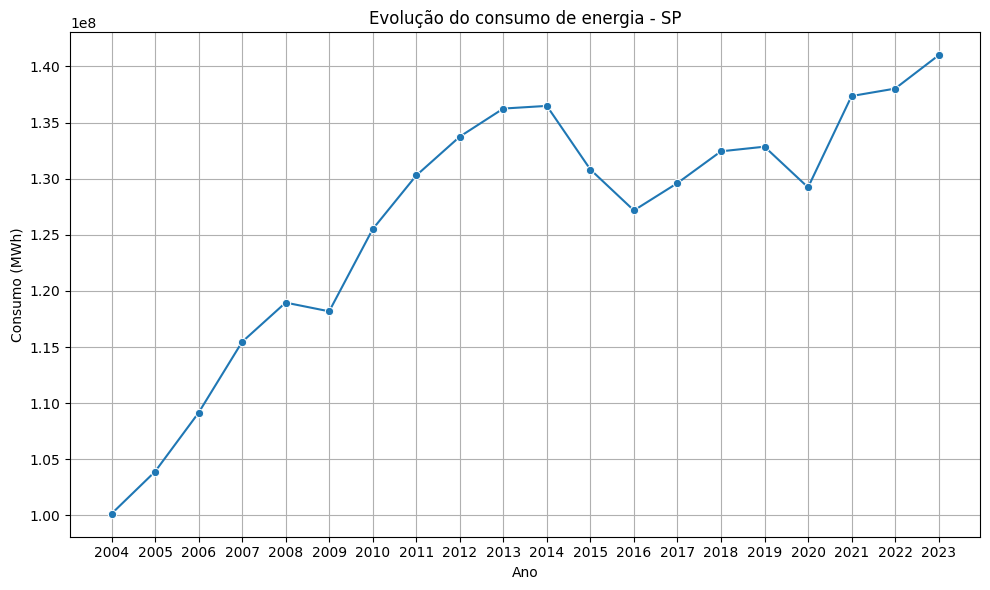

In [25]:
grafico_consumo_por_estado(df_final, 'SP')

c:\Users\dyego\Documents\Pos_graduacao_xp\ciencia_de_dados\Atividade_final\notebook\..\src\data_visulization\grafico.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mensal, x='mes', y='consumo', palette='Blues_d')


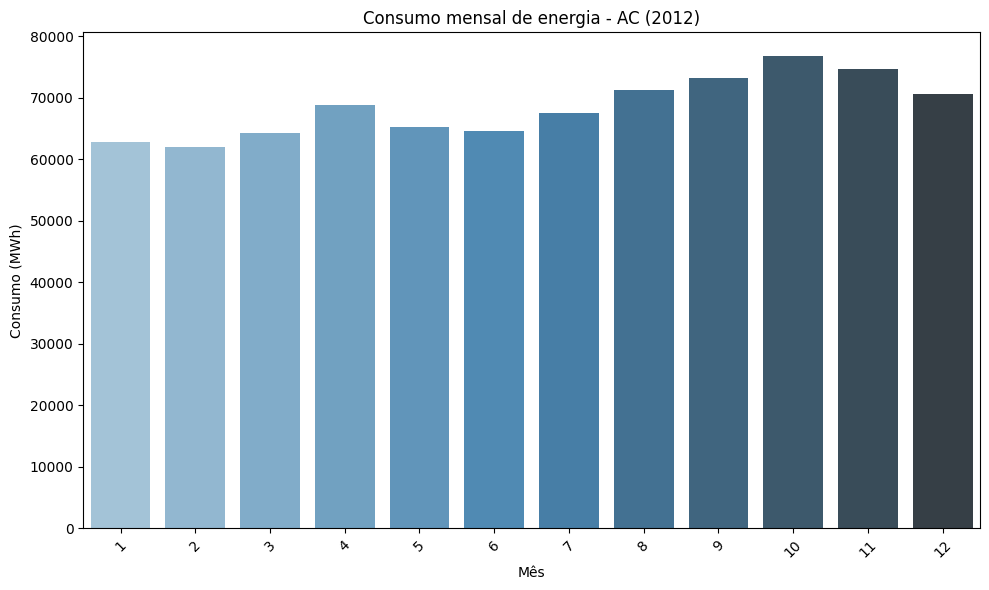

In [26]:
grafico_consumo_mensal_por_estado(df_final, "AC", 2012)

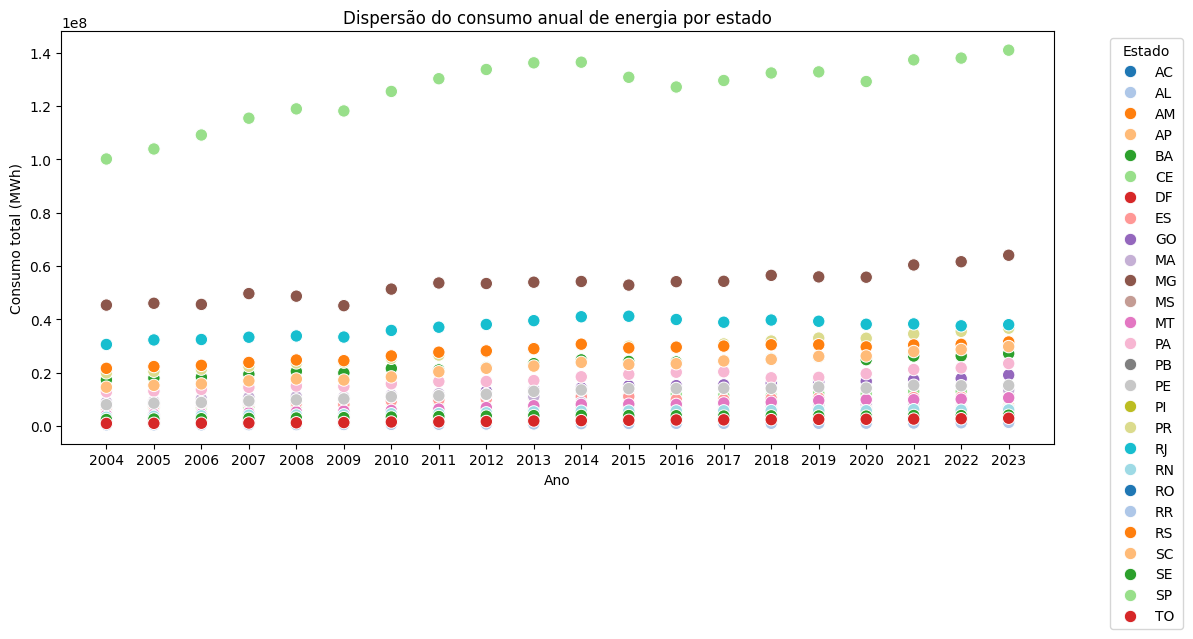

In [27]:
grafico_dispersao_consumo_anual(df_final)

* Grafico correlação do dataframe

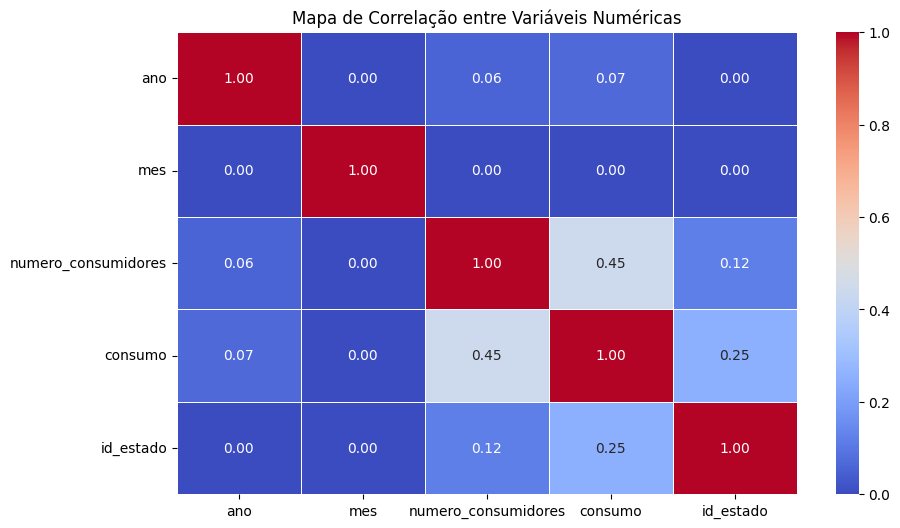

In [28]:
correlacao = df_final.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

* tendencias

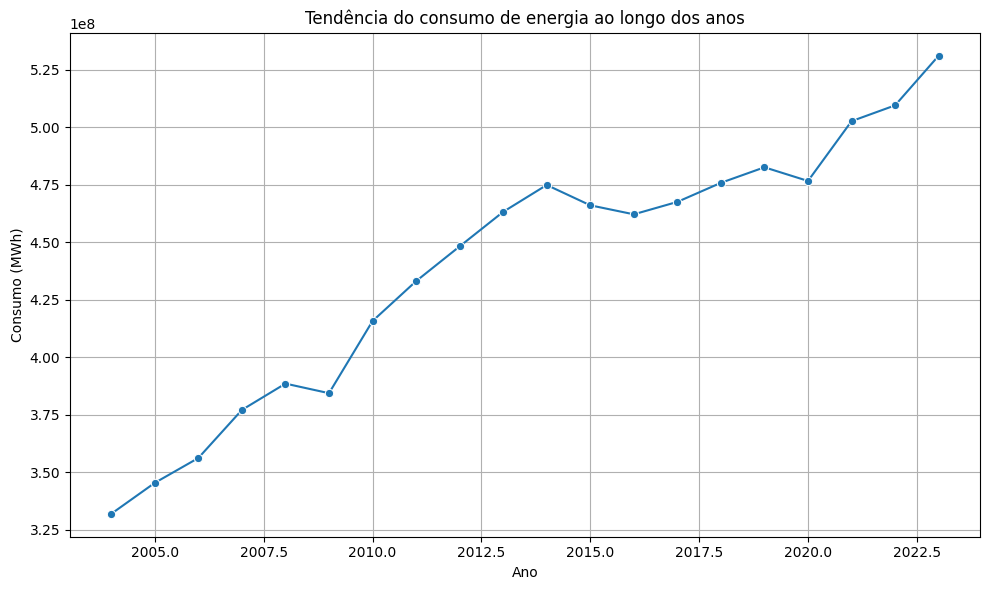

In [ ]:
df_tendencia = df_final.groupby('ano')['consumo'].sum().reset_index()

# Gráfico de tendência
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tendencia, x='ano', y='consumo', marker='o')
df_agrupado['ano'] = df_agrupado['ano'].astype(str)
plt.title('Tendência do consumo de energia ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Consumo (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()